In [30]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from functools import reduce

In [2]:
## Returns True if the arrays representing the two partitions are adjacent by a swap and false otherwise
def is_adjacent_swap(part1, part2):
    values = set(part1)
    dist_size = len(part1) / len(values)
    parts1 = np.array(list(map(lambda v: np.ma.masked_equal(part1, v).mask, values)))
    parts2 = np.array(list(map(lambda v: np.ma.masked_equal(part2, v).mask, values)))
    
    num_diff_1 = 0
    num_diff_2 = 0
    diff_part1 = []
    diff_part2 = []
    
    is_in = lambda row, matrix: np.equal(row, parts2).all(axis=1).any()
    
    for i in range(parts1.shape[0]):
        if not np.equal(parts1[i], parts2).all(axis=1).any():
            num_diff_1 += 1
            diff_part1.append(parts1[i])
        if not np.equal(parts2[i], parts1).all(axis=1).any():
            num_diff_2 += 1
            diff_part2.append(parts2[i])
            
    if num_diff_1 != 2 and num_diff_2 != 2:
        return False
    else:
        swaps = sum(diff_part1[0] ^ diff_part2[0])
        return swaps == 2 or swaps == (dist_size*2 - 2)
            

In [3]:
def adjacent_nodes_swap(nodes):
    edges = []
    for i in nodes.keys():
        for j in nodes.keys():
            if i < j and is_adjacent_swap(nodes[i], nodes[j]):
                edges.append((i, j))
    return edges

In [4]:
## Returns True if the arrays representing the two partitions are adjacent by a recom step
## and false otherwise
def is_adjacent_recom(part1, part2):
    values = set(part1)
    dist_size = len(part1) / len(values)
    parts1 = np.array(list(map(lambda v: np.ma.masked_equal(part1, v).mask, values)))
    parts2 = np.array(list(map(lambda v: np.ma.masked_equal(part2, v).mask, values)))
    
    num_diff_1 = 0
    num_diff_2 = 0
    diff_part1 = []
    diff_part2 = []
    
    is_in = lambda row, matrix: np.equal(row, parts2).all(axis=1).any()
    
    for i in range(parts1.shape[0]):
        if not np.equal(parts1[i], parts2).all(axis=1).any():
            num_diff_1 += 1
            diff_part1.append(parts1[i])
        if not np.equal(parts2[i], parts1).all(axis=1).any():
            num_diff_2 += 1
            diff_part2.append(parts2[i])
            
    return num_diff_1 == 2 and num_diff_2 == 2

In [5]:
def adjacent_nodes_recom(nodes):
    edges = []
    for i in nodes.keys():
        for j in nodes.keys():
            if i < j and is_adjacent_recom(nodes[i], nodes[j]):
                edges.append((i, j))
    return edges

In [47]:
def plot_partition(part, dim=None, **kwargs):
    if not dim:
        dim = int(np.sqrt(part.shape[0]))
        dim = (dim, dim)
    plan = part.reshape(dim)
    return plan

In [6]:
with open("enums/enum_[5,5]_[5]_5_rc.txt") as file:
    nodes_5_5={}
    for i, line in enumerate(file):
        nodes_5_5[i] = np.fromstring(line, dtype=int, sep=',')

In [8]:
edges_5_5_recom = adjacent_nodes_recom(nodes_5_5)

In [11]:
graph_5_5_recom = nx.Graph()
graph_5_5_recom.add_edges_from(edges_5_5_recom)

In [7]:
graph_5_5_recom = pickle.load(open("graph_5_5_recom.p", "rb"))

In [14]:
g_r

In [12]:
pickle.dump(graph_5_5_recom, open("graph_5_5_recom.p", "wb"))

In [5]:
edges_5_5 = adjacent_nodes(nodes_5_5)
graph_5_5 = nx.Graph()
graph_5_5.add_edges_from(edges_5_5)

In [9]:
print("# nodes:", len(graph_5_5_recom.nodes()))
print("# edges (swap):", len(g.edges()))
print("# edges (recom):", len(graph_5_5_recom.edges()))

# nodes: 4006
# edges (swap): 13416
# edges (recom): 23716


In [10]:
degrees_5_5_swap = list(map(lambda n: nx.degree(g,n), g.nodes()))
degrees_5_5_recom = list(map(lambda n: nx.degree(graph_5_5_recom,n), graph_5_5_recom.nodes()))
print("Max Degree (swap):", max(degrees_5_5_swap))
print("Min Degree (swap):", min(degrees_5_5_swap))
print("Max Degree (recom):", max(degrees_5_5_recom))
print("Min Degree (recom):", min(degrees_5_5_recom))

Max Degree (swap): 13
Min Degree (swap): 1
Max Degree (recom): 21
Min Degree (recom): 2


In [13]:
# print("Radius (swap):", nx.radius(g))
# print("Diameter (swap):", nx.diameter(g))
# print("#Centers (swap):", len(nx.center(g)))

center_5_5_recom = nx.center(graph_5_5_recom)
print("Radius (recom):", nx.radius(graph_5_5_recom))
print("Diameter (recom):", nx.diameter(graph_5_5_recom))
print("#Centers (recom):", len(center_5_5_recom))

Radius (recom): 7
Diameter (recom): 10
#Centers (recom): 878


In [14]:
nx.graph_clique_number(graph_5_5_recom)

7

In [16]:
cliques = [k for k in nx.find_cliques(graph_5_5_recom)]

In [17]:
cliques

[[0, 3562],
 [0, 4, 7],
 [1, 2080, 3118, 1510],
 [1, 2, 3, 4, 5],
 [1, 10, 24],
 [1, 3533],
 [2, 11, 25],
 [2, 2168, 3582],
 [2, 3548],
 [3, 3106, 1513, 2473, 3581, 2229, 686],
 [3, 3554],
 [3, 6],
 [3, 12, 26],
 [4, 3561],
 [4, 13, 27],
 [5, 1511, 217],
 [5, 8, 9],
 [5, 14, 28],
 [5, 3573],
 [6, 3553],
 [6, 3585, 3107, 2474, 687, 2230, 1519],
 [6, 7, 8],
 [6, 15, 21],
 [7, 16, 22],
 [7, 3556],
 [8, 1517, 218],
 [8, 17, 23],
 [8, 3570],
 [9, 3572],
 [9, 29],
 [9, 1524, 219],
 [10, 2087, 3122, 1527],
 [10, 3016, 1618, 3858, 55],
 [10, 11, 12, 13, 14],
 [11, 3017, 3859, 56, 1619],
 [11, 3593, 2172],
 [12, 2500, 3592, 2264, 3121, 1530, 703],
 [12, 3018, 57, 1620, 3860],
 [12, 15],
 [13, 16],
 [13, 3019, 3861, 58, 1621],
 [14, 352, 1528],
 [14, 3020, 59, 1622, 3862],
 [14, 17],
 [15, 705, 2501, 3123, 2266, 3595, 1534],
 [15, 1623, 119, 3021, 3991],
 [15, 16, 17],
 [16, 3022, 3992, 1624, 120],
 [17, 121, 1625, 3993, 3023],
 [17, 1532, 357],
 [18, 3597, 2175],
 [18, 3024, 1119],
 [18, 19, 20

In [18]:
cliques_7 = list(filter(lambda ls: len(ls) == 7, cliques))
cliques_6 = list(filter(lambda ls: len(ls) == 6, cliques))
cliques_5 = list(filter(lambda ls: len(ls) == 5, cliques))
cliques_4 = list(filter(lambda ls: len(ls) == 4, cliques))
cliques_3 = list(filter(lambda ls: len(ls) == 3, cliques))
cliques_2 = list(filter(lambda ls: len(ls) == 2, cliques))

In [103]:
print("# 7 Cliques:", len(cliques_7))
print("# 6 Cliques:", len(cliques_6))
print("# 5 Cliques:", len(cliques_5))
print("# 4 Cliques:", len(cliques_4))
print("# 3 Cliques:", len(cliques_3))
print("# 2 Cliques:", len(cliques_2))

# 7 Cliques: 292
# 6 Cliques: 0
# 5 Cliques: 628
# 4 Cliques: 440
# 3 Cliques: 2040
# 2 Cliques: 2544


In [31]:
c7 = reduce(lambda x, y: x+y, cliques_7)

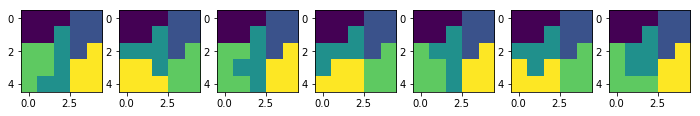

In [85]:
c = cliques_7[250]
fig, axs = plt.subplots(1,len(c), figsize=(12,3))
for i, part in enumerate(c):
    axs[i].imshow(plot_partition(nodes_5_5[part]))

In [41]:
list(filter(lambda x: x[1]==2, [(n, c7.count(n)) for n in graph_5_5_recom.nodes]))

[(2500, 2),
 (2501, 2),
 (858, 2),
 (953, 2),
 (1197, 2),
 (100, 2),
 (75, 2),
 (84, 2),
 (125, 2),
 (1092, 2),
 (596, 2),
 (1213, 2),
 (599, 2),
 (1238, 2),
 (601, 2),
 (849, 2),
 (965, 2),
 (1208, 2),
 (1675, 2),
 (1677, 2),
 (1681, 2),
 (2381, 2),
 (1664, 2),
 (1665, 2),
 (1666, 2),
 (1042, 2),
 (419, 2),
 (649, 2),
 (413, 2),
 (510, 2),
 (421, 2),
 (654, 2),
 (292, 2),
 (423, 2),
 (651, 2),
 (211, 2),
 (223, 2),
 (3569, 2),
 (3571, 2),
 (3575, 2),
 (230, 2),
 (483, 2),
 (484, 2),
 (488, 2),
 (468, 2),
 (469, 2),
 (477, 2),
 (481, 2),
 (538, 2),
 (2968, 2),
 (2970, 2),
 (2974, 2),
 (465, 2),
 (2521, 2),
 (475, 2),
 (1895, 2),
 (2371, 2),
 (2614, 2),
 (2744, 2),
 (1898, 2),
 (2374, 2),
 (2620, 2),
 (2755, 2),
 (1899, 2),
 (2375, 2),
 (2624, 2),
 (2758, 2),
 (1959, 2),
 (2633, 2),
 (2792, 2),
 (1961, 2),
 (2383, 2),
 (2636, 2),
 (2799, 2),
 (1965, 2),
 (2387, 2),
 (2643, 2),
 (2814, 2),
 (2024, 2),
 (2389, 2),
 (2650, 2),
 (2828, 2),
 (2025, 2),
 (2390, 2),
 (2652, 2),
 (2829, 2),
 (2

In [95]:
cliques_not_2 = list(filter(lambda ls: len(ls) != 2, cliques))

In [96]:
cs_7543 = reduce(lambda x, y: x+y, cliques_not_2)

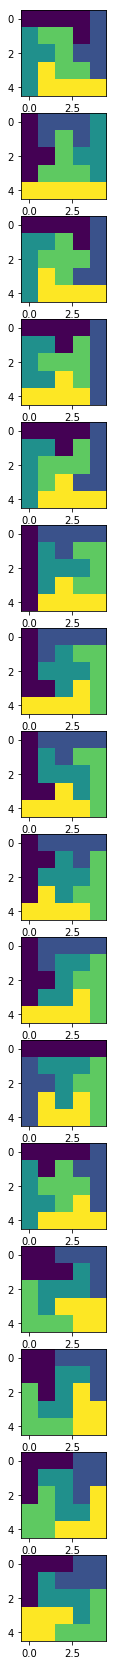

In [111]:
c = list(filter(lambda x: x not in cs_7543, graph_5_5_recom.nodes()))
fig, axs = plt.subplots(len(c),1, figsize=(2,30))
for i, part in enumerate(c):
    axs[i].imshow(plot_partition(nodes_5_5[part]))

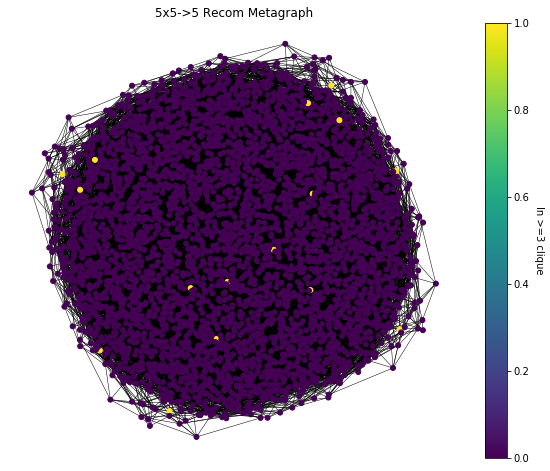

In [112]:
plt.figure(figsize=(10,8))
plt.title("5x5->5 Recom Metagraph")
nx.draw_kamada_kawai(graph_5_5_recom, node_size=25, width=0.5,
                     node_color=[node not in cs_7543 for node in graph_5_5_recom])
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin = 0,vmax=1))
sm._A = []
cb = plt.colorbar(sm)
cb.ax.set_ylabel("In >=3 clique", rotation=-90, va="bottom")
plt.show()

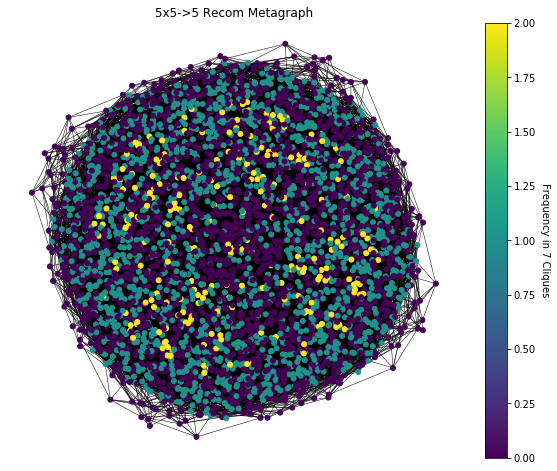

In [37]:
plt.figure(figsize=(10,8))
plt.title("5x5->5 Recom Metagraph")
nx.draw_kamada_kawai(graph_5_5_recom, node_size=25, width=0.5,
                     node_color=[c7.count(node) for node in graph_5_5_recom])
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin = 0,vmax=2))
sm._A = []
cb = plt.colorbar(sm)
cb.ax.set_ylabel("Frequency in 7 Cliques", rotation=-90, va="bottom")
plt.show()

In [27]:
clique_graph = nx.make_max_clique_graph(graph_5_5_recom)

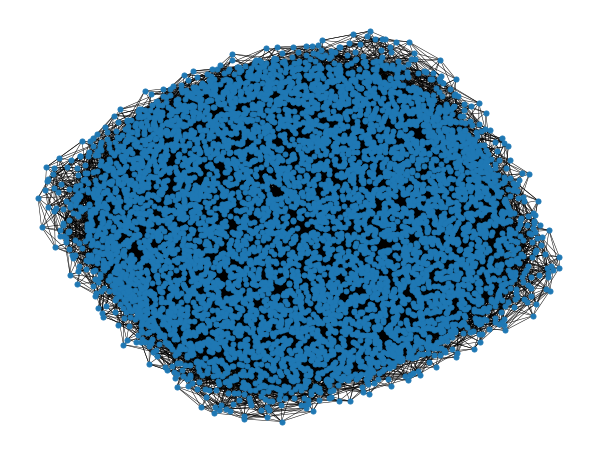

In [28]:
plt.figure(figsize=(8,6))
nx.draw_kamada_kawai(clique_graph, node_size=25, width=0.5)

In [13]:
center_5_5 = nx.center(graph_5_5)

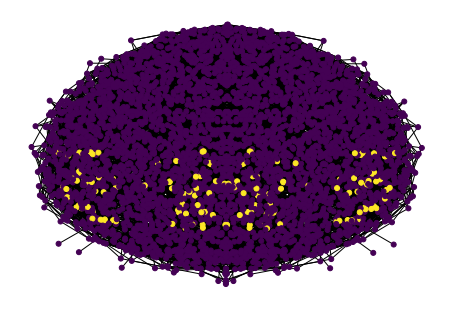

In [14]:
nx.draw_kamada_kawai(graph_5_5, node_size=25,
                     node_color=[n in center_5_5 for n in graph_5_5.nodes()])

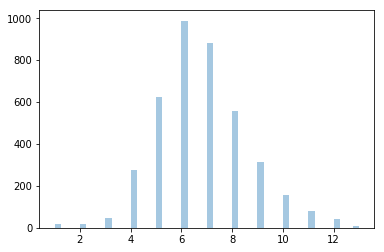

In [12]:
sns.distplot(degrees_5_5, kde=False)

In [8]:
g = pickle.load(open("graph_5_5_5.p", "rb"))

In [18]:
g